In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Parameters
input_shape = (224, 224, 3)  # Input shape for MobileNet
num_classes = 25 
batch_size = 32
epochs = 10

# Load MobileNet pre-trained on ImageNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model and the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data preparation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Replace these paths with your dataset directory paths
train_data_dir = 'data_waste/train'
val_data_dir = 'data_waste/valid'

# Generate data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

# Unfreeze the base model and fine-tune
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=5  # Fine-tune for additional epochs
)

# Save the model
model.save('mobilenet_image_classification_model.h5')

# Load and evaluate the model (optional)
model = tf.keras.models.load_model('mobilenet_image_classification_model.h5')
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


Found 4060 images belonging to 25 classes.
Found 1153 images belonging to 25 classes.
Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.5242 - loss: 1.7070 - val_accuracy: 0.7769 - val_loss: 0.6924
Epoch 2/10
  1/126 ━━━━━━━━━━━━━━━━━━━━ 2:06 1s/step - accuracy: 0.6562 - loss: 0.7121

C:\Users\arshi\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6562 - loss: 0.7121 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.8308 - loss: 0.5421 - val_accuracy: 0.8064 - val_loss: 0.6015
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.7812 - loss: 0.6883 - val_accuracy: 1.0000 - val_loss: 0.6567
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.8665 - loss: 0.3857 - val_accuracy: 0.8229 - val_loss: 0.5438
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.8438 - loss: 0.6194 - val_accuracy: 1.0000 - val_loss: 0.0533
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.8932 - loss: 0.3231 - val_accuracy: 0.8429 - val_loss: 0.5102
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9375 - loss: 0.2311 - val_accuracy: 1.0000 - val_loss: 0.0402
Epoch 9/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.9013 - loss: 0.2924 - val_accuracy: 0.8

37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8461 - loss: 0.5580
Validation Loss: 0.5441986918449402, Validation Accuracy: 0.8516912460327148


37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step


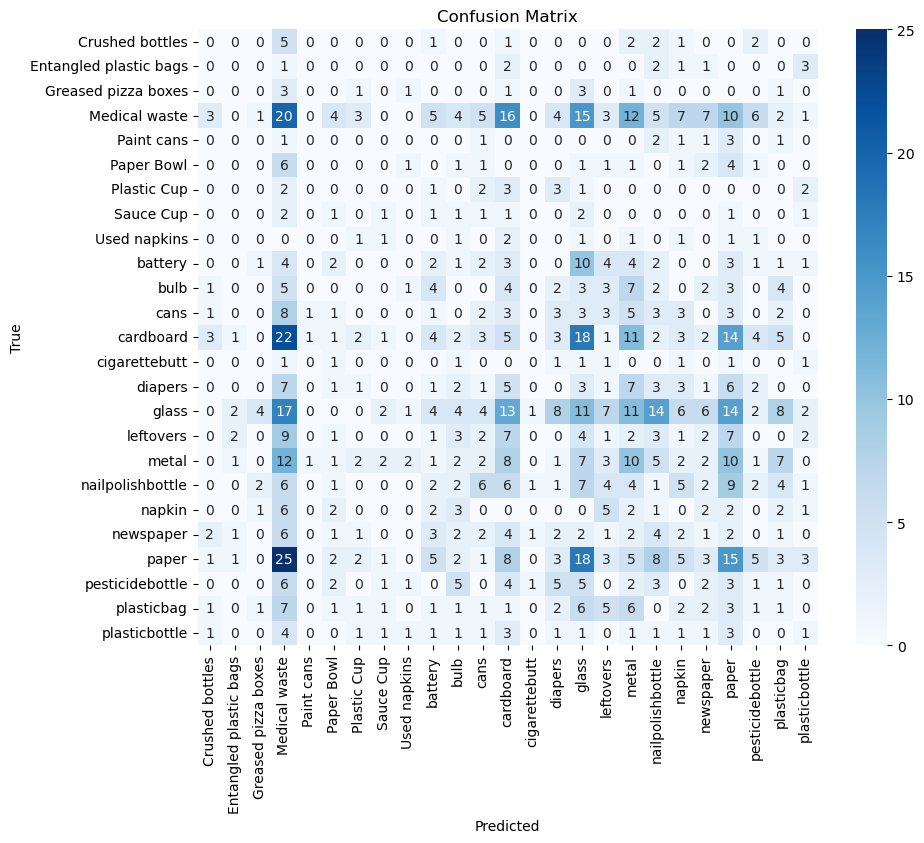

Classification Report
                        precision    recall  f1-score   support

       Crushed bottles       0.00      0.00      0.00        14
Entangled plastic bags       0.00      0.00      0.00        10
   Greased pizza boxes       0.00      0.00      0.00        11
         Medical waste       0.11      0.15      0.13       133
            Paint cans       0.00      0.00      0.00        10
            Paper Bowl       0.00      0.00      0.00        20
           Plastic Cup       0.00      0.00      0.00        14
             Sauce Cup       0.09      0.08      0.09        12
          Used napkins       0.00      0.00      0.00        10
               battery       0.05      0.05      0.05        41
                  bulb       0.00      0.00      0.00        41
                  cans       0.05      0.05      0.05        42
             cardboard       0.05      0.05      0.05       108
         cigarettebutt       0.00      0.00      0.00         9
               di

In [11]:
# Generate predictions on the validation set
val_generator.reset()  # Reset the generator to ensure consistency
predictions = model.predict(val_generator, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = val_generator.classes[:len(predicted_classes)]  # Align the lengths

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report
print("Classification Report")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
